# Introduction

This notebook shows how to share data frame between scala and python, and plot in python using the cell magic. This notebook is based on https://github.com/Valassis-Digital-Media/spylon-kernel/blob/master/examples/basic_example.ipynb

**Note**: only work on spylon kernel, not almond kernel.

In [1]:
// create data frame in scala
val someDF = Seq(
  (8, "bat"),
  (64, "mouse"),
  (-27, "horse")
).toDF("number", "word")

Intitializing Scala interpreter ...

Spark Web UI available at http://98febfbcd5bb:4040
SparkContext available as 'sc' (version = 2.4.3, master = local[*], app id = local-1559129111018)
SparkSession available as 'spark'


someDF: org.apache.spark.sql.DataFrame = [number: int, word: string]


# Sharing Scala Spark Dataframe with Python

We can share a dataframe by registering it as a view. The spark session that exists in the python magic is the same one as on the scala side. For this, you will need to install pandas, either from BASH or from notebook.

In [2]:
!pip install pandas

     |################################| 10.1MB 2.8MB/s eta 0:00:01
     |################################| 512kB 3.9MB/s eta 0:00:01
     |################################| 17.3MB 3.0MB/s eta 0:00:01


In [3]:
someDF.createOrReplaceTempView("someDataFrame")

In [4]:
%%python
df = spark.sql("select number, word from someDataFrame").toPandas()

In [9]:
%%python
print(df)

   number   word
0       8    bat
1      64  mouse
2     -27  horse


# Plotting Example

Plotting with matplotlib can be a little tedious but still pretty simple to do. First we need to install matplotlib, either using BASH or notebook.

In [7]:
!pip install matplotlib

     |################################| 13.1MB 1.8MB/s eta 0:00:01
     |################################| 92kB 1.6MB/s eta 0:00:01
     |################################| 71kB 1.6MB/s eta 0:00:011


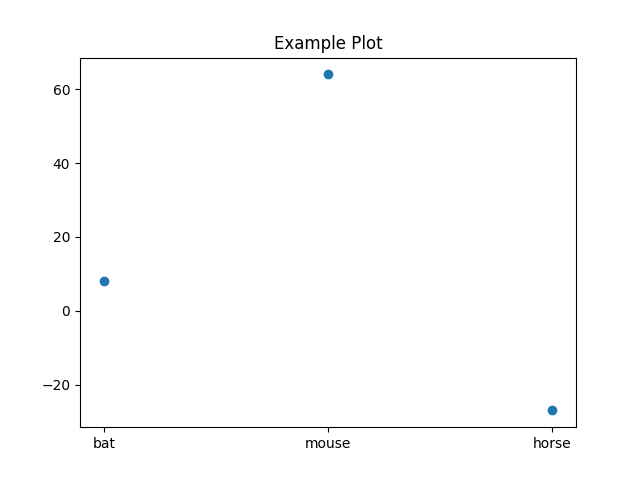

In [8]:
%%python
from matplotlib import pyplot as plt
from IPython.display import Image
import tempfile
plt.clf()
plt.scatter(df["word"], df["number"])
plt.title("Example Plot")
with tempfile.NamedTemporaryFile(suffix=".png") as fo:
    plt.savefig(fo.name)
    retval = Image(filename=fo.name)